In [2]:
import pandas as pd
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
data = Path('./data/train')
file = Path('./data/train/_annotations.coco.json')
coco = COCO(file)
image_id = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
categories = [cat['name'] for cat in cats]
print(f"Количество категорий: {len(categories)}")
print("Категории:")
print(categories)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Количество категорий: 2
Категории:
['Cars', 'Cars']


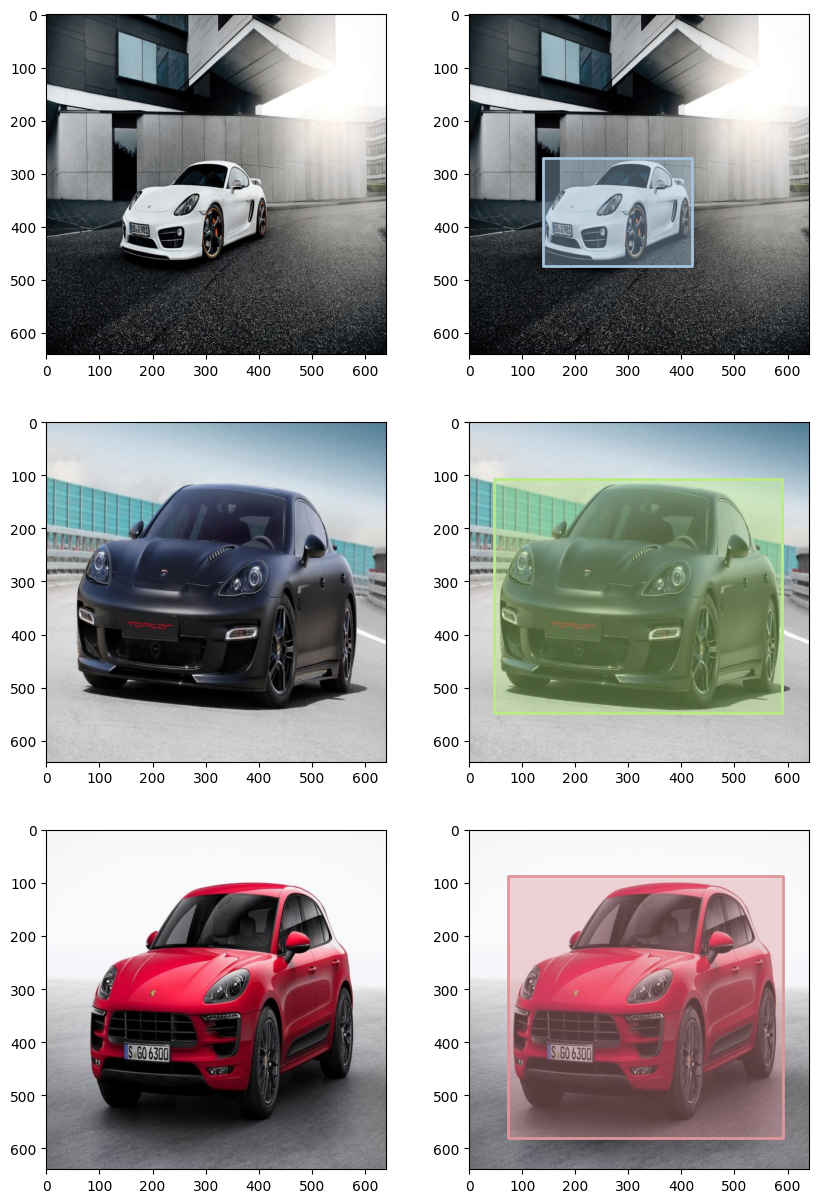

In [4]:
imgs = coco.loadImgs(image_id[-3:])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(data/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)